# Estimating distributions (part 2)
The goal of this notebook is to explore a first approach to approximate $p(y|x)$ and $p(x|y)$ on a tabular dataset where $x$ is real-valued, $x\in\mathbb{R}^k$, and the target $y$ is discrete and finite, $y\in\{0,\ldots,d\}⊆\mathbb{N}, d\geq 1$.

## Imports

In [2]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

linspace dice la cantidad de bins con digitize te dice en cual bin va el x,  para histogramas

para pasar del espacio continuo al discreto

un enveding es pasar de un espacio a otro

## Load data set

In [3]:
iris = datasets.load_iris()

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
X = iris.data
y = iris.target

In [7]:
sepal_length = X[:, 0]
sepal_length

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [8]:
np.histogram(sepal_length)

(array([ 9, 23, 14, 27, 16, 26, 18,  6,  5,  6]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]))

In [9]:
bins = np.linspace(4,7,5)
bins

array([4.  , 4.75, 5.5 , 6.25, 7.  ])

In [33]:
np.digitize(4.8, bins)

2

In [11]:
h = np.histogram(sepal_length, bins=bins)

(array([11., 41., 47., 39.]),
 array([4.  , 4.75, 5.5 , 6.25, 7.  ]),
 <BarContainer object of 4 artists>)

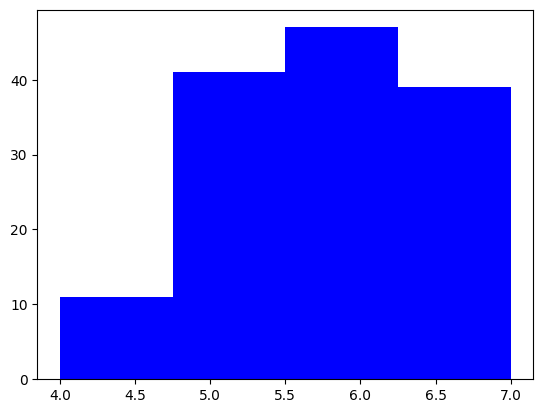

In [12]:
plt.hist(sepal_length, bins, facecolor='blue')

In [18]:
count = h[0]
count

array([11, 41, 47, 39])

In [19]:
proba  = count / np.sum(count)
proba

array([0.07971014, 0.29710145, 0.34057971, 0.2826087 ])

In [22]:
np.where(sepal_length<4.75)

(array([ 2,  3,  6,  8, 13, 22, 29, 38, 41, 42, 47]),)

In [29]:
np.random.choice(bins[:-1], size=1, p=proba)

array([4.75])

In [34]:
np.random.uniform(low=4.75, high=5.5)

5.429442281836

## Approximate $p(y|x)$
Take $x$ to be sepal length and estimate the conditional probability of the target variable $y$ given $x$. Then, sample 10 values of $y$ given a $x=4.75$.

## Approximate $p(x|y)$
Take $y$ to be setosa and estimate the probability of sepal length given setosa (or, equivalently, the *likelihood* of setosa given sepal length). Then, generate 10 samples of sepal length and label them appropriately.

1) calcular para sepal leng los bins para cada y en un mismo histograma 
2) para cada y hacer un histograma 
